# 数据读取

In [1]:
import pandas as pd

BH_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/BH_tif_400_400_after_processing.csv',
                                              sep=',', header=None)
BV_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/BV_tif_400_400_after_processing.csv',
                                              sep=',', header=None)
CNM_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/CNM_tif_400_400_after_processing.csv',
                                               sep=',', header=None)
LAI_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/LAI_tif_400_400_after_processing.csv',
                                               sep=',', header=None)
DSM_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/DSM_tif_400_400_after_processing.csv',
                                               sep=',', header=None)
Weather_1795_6_after_processing = pd.read_csv('useful_data_after_processing/weather_1795_6.csv', sep=',')


In [2]:
Weather_1795_6_after_processing

,tempMin,tempMax,cloudCover,humidity,windSpeed,visibility
0,7.53,12.23,0.80,0.89,14.69,4.43
1,3.58,7.15,0.62,0.79,15.04,5.64
2,-0.61,6.54,0.31,0.84,4.48,6.20
3,-0.63,7.59,0.78,0.85,4.35,6.22
4,6.51,10.43,0.85,0.91,6.20,5.91
...,...,...,...,...,...,...
1790,8.55,10.57,0.96,0.85,6.80,10.00
1791,5.79,9.40,0.87,0.85,6.82,9.03
1792,2.30,6.67,0.40,0.79,5.15,10.00
1793,1.08,6.14,0.18,0.76,4.85,9.11


# 数据处理

In [3]:
import numpy as np

In [4]:
X = np.stack([BH_tif_400_400_after_processing, BV_tif_400_400_after_processing, CNM_tif_400_400_after_processing,
              LAI_tif_400_400_after_processing, DSM_tif_400_400_after_processing], axis=-1)

In [5]:
X.shape

(400, 400, 5)

In [6]:
Y = Weather_1795_6_after_processing['tempMax']

In [7]:
Y.shape

(1795,)

In [47]:
# 将Y数据分为训练集和验证集（80%训练，20%验证）
# Y_train, Y_val = train_test_split(Y, test_size=0.2, random_state=42)

# 模型构建

In [48]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset, random_split
# import numpy as np


In [49]:
# class CNNFeatureExtractor(nn.Module):
#     def __init__(self):
#         super(CNNFeatureExtractor, self).__init__()
#         self.conv1 = nn.Conv2d(4, 32, kernel_size=3, padding=1)  # 输入400*400*4，输出400*400*32
#         self.pool1 = nn.MaxPool2d(2, 2)  # 输出200*200*32
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 输出200*200*64
#         self.pool2 = nn.MaxPool2d(2, 2)  # 输出100*100*64
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # 输出100*100*128
#         self.pool3 = nn.MaxPool2d(2, 2)  # 输出50*50*128
#         self.fc = nn.Linear(128 * 50 * 50, 128)  # 输出128
# 
#     def forward(self, x):
#         x = self.pool1(torch.relu(self.conv1(x)))
#         x = self.pool2(torch.relu(self.conv2(x)))
#         x = self.pool3(torch.relu(self.conv3(x)))
#         x = x.view(-1, 128 * 50 * 50)  # -1表示自适应, 一般是batch_size
#         x = torch.relu(self.fc(x))
#         return x
# 
# class CNNLSTMModel(nn.Module):
#     def __init__(self, seq_length):
#         super(CNNLSTMModel, self).__init__()
#         self.cnn = CNNFeatureExtractor()  # CNN特征提取器（不改变形状）
#         self.lstm = nn.LSTM(128, 128, batch_first=True)  # batch_first=True 表示输入和输出的第一个维度是批次大小。 128 -> 128
#         self.fc = nn.Linear(128, 1)  # 128 -> 1
#         self.seq_length = seq_length
# 
#     def forward(self, x):
#         batch_size = x.size(0)  # 获取批次大小，x.size() => [batch_size, 4, 400, 400]
#         
#         # CNN特征提取
#         cnn_out = self.cnn(x)
#         # cnn_out.size() => [batch_size, 128]
#         # 这里CNN的输出是一个128维的特征向量，不再有空间维度
# 
#         # 调整形状以适应LSTM输入
#         cnn_out = cnn_out.unsqueeze(1).repeat(1, self.seq_length, 1)
#         # cnn_out.size() => [batch_size, seq_length, 128]
#         # 通过unsqueeze在第二维添加一个维度，然后repeat扩展成seq_length长的时间序列数据
#         # 其中每个seq_length的数据都是一样的CNN特征
# 
#         # LSTM
#         lstm_out, _ = self.lstm(cnn_out)
#         # lstm_out.size() => [batch_size, seq_length, 128]
#         # LSTM输出的形状与输入相同，输出也是每个时间步长一个128维的向量
# 
#         # 全连接层处理
#         output = self.fc(lstm_out)
#         # output.size() => [batch_size, seq_length, 1]
#         # 全连接层将LSTM的每个时间步长的128维输出转换为1维的预测值
# 
#         return output


In [50]:
# # 假设你已经有了X和Y数据
# # X = np.random.rand(400, 400, 4)  # 示例数据，应替换为真实数据
# # Y = np.random.rand(1000, 1)  # 示例数据，应替换为真实数据
# 
# X = torch.tensor(X, dtype=torch.float32).unsqueeze(0).permute(0, 3, 1, 2)  # 转换为[N, C, H, W]
# Y = torch.tensor(Y, dtype=torch.float32)


In [51]:
# X.shape

In [52]:
# Y.shape

In [53]:
# 创建数据集和数据加载器
# dataset = TensorDataset(X, Y)

In [54]:
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# 
# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=1)


In [55]:
# # 定义模型、损失函数和优化器
# model = CNNLSTMModel(seq_length=1000)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# 
# # 训练模型
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, targets in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs.squeeze(), targets)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader)}')
# 
#     # 验证模型
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for inputs, targets in val_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs.squeeze(), targets)
#             val_loss += loss.item()
#     print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss/len(val_loader)}')
# 
# # 输出验证集结果
# model.eval()
# with torch.no_grad():
#     for inputs, targets in val_loader:
#         outputs = model(inputs)
#         print("Validation Predictions: ", outputs.squeeze().numpy())
#         print("Validation Targets: ", targets.numpy())


In [8]:
X_original = X

In [9]:
Y_original = Y

In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# 初始设定 n = 5
n = 5
seq_length = 20


# 将时间序列拆分为输入序列和预测值
def create_sequences(data, seq_length):
    X_seq = []
    Y_seq = []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i + seq_length])
        Y_seq.append(data[i + seq_length])
    return np.array(X_seq), np.array(Y_seq)


# 拆分时间序列数据
Y_seq, Y_target = create_sequences(Y_original, seq_length)
Y_seq = np.expand_dims(Y_seq, axis=-1)  # [980, 20, 1]
Y_target = np.expand_dims(Y_target, axis=-1)  # [980, 1]


In [11]:
Y_seq.shape

(1775, 20, 1)

In [12]:
Y_target.shape

(1775, 1)

In [13]:
# 转换为 PyTorch 张量
X_land = torch.tensor(X_original, dtype=torch.float32).unsqueeze(0).repeat(Y_seq.shape[0], 1, 1, 1)
Y_seq = torch.tensor(Y_seq, dtype=torch.float32)
Y_target = torch.tensor(Y_target, dtype=torch.float32)


In [14]:
X_land.shape

torch.Size([1775, 400, 400, 5])

In [15]:
Y_seq.shape

torch.Size([1775, 20, 1])

In [16]:
Y_target.shape

torch.Size([1775, 1])

In [17]:
# # 数据集拆分为训练集和验证集
# train_size = int(0.8 * Y_seq.shape[0])
# val_size = Y_seq.shape[0] - train_size
# 
# train_dataset, val_dataset = random_split(TensorDataset(X_land, Y_seq, Y_target), [train_size, val_size])
# 
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32)


In [18]:
# 输出dataloader的信息, 输出第一次和最后一次的信息
def print_dataloader_info(loader):
    for i, (land_data, temp_seq, target) in enumerate(loader):

        if i == 0 or i == len(loader) - 1:
            print(f'lenth of loader: {len(loader)}')
            print(f'Batch {i + 1}')
            print(f'Land Data Shape: {land_data.shape}')
            print(f'Temporal Sequence Shape: {temp_seq.shape}')
            print(f'Target Shape: {target.shape}')
            print()

In [19]:
# print_dataloader_info(train_loader)

In [20]:
# print_dataloader_info(val_loader)

In [21]:
# 定义CNN特征提取器和LSTM模型
class CNNFeatureExtractor(nn.Module):
    def __init__(self, in_channels):
        super(CNNFeatureExtractor, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc = nn.Linear(128 * 50 * 50, 128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.reshape(-1, 128 * 50 * 50)
        x = torch.relu(self.fc(x))
        return x


class LSTMWithSpatialFeatures(nn.Module):
    def __init__(self, seq_length, in_channels=1):
        super(LSTMWithSpatialFeatures, self).__init__()  # 确保最开始调用 super().__init__()
        # 判断是否使用CNN
        if in_channels > 0:
            self.use_cnn = True
            self.cnn = CNNFeatureExtractor(in_channels=in_channels)
            lstm_input_size = 128 + 1  # CNN输出的128维特征 + 1维时间序列数据
        else:
            self.use_cnn = False
            lstm_input_size = 1  # 只有时间序列数据，没有CNN输出

        self.lstm = nn.LSTM(input_size=lstm_input_size, hidden_size=128, batch_first=True)
        self.fc = nn.Linear(128, 1)

    def forward(self, land_data, temp_seq):
        if self.use_cnn:

            # 调整输入形状为 [batch_size, in_channels, height, width]
            land_data = land_data.permute(0, 3, 1,
                                          2)  # 之前的形状 [batch_size, 400, 400, 4] -> 新形状 [batch_size, 4, 400, 400]

            cnn_out = self.cnn(land_data)
            # 经过 CNN 处理后
            # land_data -> [batch_size, 4, 400, 400]
            # CNN 的输出 cnn_out -> [batch_size, 128]  # 经过卷积和全连接层后，输出为 128 维的特征向量

            cnn_out = cnn_out.unsqueeze(1).repeat(1, temp_seq.size(1), 1)
            # 在第二个维度（时间步长维度）增加一个维度，然后沿着这个维度重复
            # cnn_out -> [batch_size, 1, 128] -> [batch_size, seq_length, 128]  # 这里 seq_length = temp_seq.size(1)

            combined_input = torch.cat((cnn_out, temp_seq), dim=2)
            # 将 CNN 输出的特征向量和温度序列数据结合
            # temp_seq -> [batch_size, seq_length, 1]
            # combined_input -> [batch_size, seq_length, 128 + 1] -> [batch_size, seq_length, 129]
        else:
            combined_input = temp_seq
            # combined_input -> [batch_size, seq_length, 1]  只有时间序列数据

        lstm_out, _ = self.lstm(combined_input)
        # 经过 LSTM 层处理
        # combined_input -> [batch_size, seq_length, 129]
        # lstm_out -> [batch_size, seq_length, 128]  # LSTM 的输出是 128 维的特征向量        

        output = self.fc(lstm_out[:, -1, :])
        # 取 LSTM 最后一层输出，并通过全连接层进行预测
        # lstm_out[:, -1, :] -> [batch_size, 128]
        # output -> [batch_size, 1]  # 最终输出一个标量，表示下一时间步长的预测值

        return output


In [22]:
# 训练和验证函数
def train_and_evaluate(model, train_loader, val_loader, num_epochs=10):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    val_losses = []  # 用于存储每个 epoch 的验证集损失

    for epoch in range(num_epochs):
        print(f'----------Epoch {epoch + 1}/{num_epochs}----------')
        model.train()
        train_loss = 0.0
        print('----------Training----------')
        for i, (land_data, temp_seq, target) in enumerate(train_loader):
            print(f'Batch {i + 1}/{len(train_loader)}')
            optimizer.zero_grad()
            output = model(land_data, temp_seq)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            print(f'Batch Loss: {loss.item()}')
        print(f'Training Loss: {train_loss / len(train_loader)}')

        model.eval()
        val_loss = 0.0
        print('----------Validation----------')
        with torch.no_grad():
            for i, (land_data, temp_seq, target) in enumerate(val_loader):
                print(f'Batch {i + 1}/{len(val_loader)}')
                output = model(land_data, temp_seq)
                loss = criterion(output, target)
                val_loss += loss.item()
                print(f'Batch Loss: {loss.item()}')
        print(f'Validation Loss: {val_loss / len(val_loader)}')

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)  # 将每个 epoch 的验证集损失存储起来
        print(f'Validation Loss: {avg_val_loss}')

    return val_losses  # 返回所有 epoch 的验证集损失

In [23]:
# 比较不同模型的函数
specific_indices = None

In [24]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# 数据集大小
total_size = X_land.shape[0]
train_size = int(0.8 * total_size)
val_size = total_size - train_size

# 创建使用完整 X_land 的 DataLoader
train_dataset_full, val_dataset_full = random_split(TensorDataset(X_land, Y_seq, Y_target), [train_size, val_size])

train_loader_full = DataLoader(train_dataset_full, batch_size=32, shuffle=True)
val_loader_full = DataLoader(val_dataset_full, batch_size=32)

# 创建使用单独通道的 DataLoader
channels = [0, 1, 2, 3, 4]
train_loaders = {}
val_loaders = {}

for channel in channels:
    X_land_channel = X_land[:, :, :, channel:channel + 1]  # 选择单个通道
    train_dataset_channel, val_dataset_channel = random_split(TensorDataset(X_land_channel, Y_seq, Y_target),
                                                              [train_size, val_size])

    train_loaders[channel] = DataLoader(train_dataset_channel, batch_size=32, shuffle=True)
    val_loaders[channel] = DataLoader(val_dataset_channel, batch_size=32)

# 结果展示
print("train_loader_full length:", len(train_loader_full))
print("val_loader_full length:", len(val_loader_full))

for channel in channels:
    print(f"train_loader_channel_{channel} length:", len(train_loaders[channel]))
    print(f"val_loader_channel_{channel} length:", len(val_loaders[channel]))

train_loader_full length: 45
val_loader_full length: 12
train_loader_channel_0 length: 45
val_loader_channel_0 length: 12
train_loader_channel_1 length: 45
val_loader_channel_1 length: 12
train_loader_channel_2 length: 45
val_loader_channel_2 length: 12
train_loader_channel_3 length: 45
val_loader_channel_3 length: 12
train_loader_channel_4 length: 45
val_loader_channel_4 length: 12


In [25]:
num_epochs = 10

In [26]:
results = {}

In [100]:
%%time
# Baseline
print("Training baseline model...")
model_baseline = LSTMWithSpatialFeatures(seq_length=seq_length, in_channels=0)  # 无空间数据
results["Baseline"] = train_and_evaluate(model_baseline, train_loader_full, val_loader_full, num_epochs=num_epochs)
print(f"Baseline MSE: {results['Baseline']}")

Training baseline model...
----------Epoch 1/10----------
----------Training----------
Batch 1/45
Batch Loss: 212.8663330078125
Batch 2/45
Batch Loss: 185.35992431640625
Batch 3/45
Batch Loss: 235.03521728515625
Batch 4/45
Batch Loss: 168.47830200195312
Batch 5/45
Batch Loss: 219.99832153320312
Batch 6/45
Batch Loss: 165.16363525390625
Batch 7/45
Batch Loss: 194.74191284179688
Batch 8/45
Batch Loss: 188.68881225585938
Batch 9/45
Batch Loss: 157.0052490234375
Batch 10/45
Batch Loss: 170.28648376464844
Batch 11/45
Batch Loss: 128.37962341308594
Batch 12/45
Batch Loss: 129.00379943847656
Batch 13/45
Batch Loss: 155.94769287109375
Batch 14/45
Batch Loss: 123.81684112548828
Batch 15/45
Batch Loss: 154.01490783691406
Batch 16/45
Batch Loss: 117.64701843261719
Batch 17/45
Batch Loss: 132.06423950195312
Batch 18/45
Batch Loss: 150.2120819091797
Batch 19/45
Batch Loss: 107.8979263305664
Batch 20/45
Batch Loss: 106.93509674072266
Batch 21/45
Batch Loss: 112.80461120605469
Batch 22/45
Batch Loss:

In [101]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944]}

In [102]:
%%time
# Baseline + n种所有空间数据
print(f"\nTraining baseline + all {n} spatial features model...")
model_baseline_n = LSTMWithSpatialFeatures(seq_length=seq_length, in_channels=n)
results[f"Baseline + all {n} features"] = train_and_evaluate(model_baseline_n, train_loader_full, val_loader_full,
                                                             num_epochs=num_epochs)
print(f"Baseline + all {n} features MSE: {results[f'Baseline + all {n} features']}")



Training baseline + all 5 spatial features model...
----------Epoch 1/10----------
----------Training----------
Batch 1/45
Batch Loss: 198.4068603515625
Batch 2/45
Batch Loss: 195.08892822265625
Batch 3/45
Batch Loss: 163.10325622558594
Batch 4/45
Batch Loss: 195.43077087402344
Batch 5/45
Batch Loss: 143.55181884765625
Batch 6/45
Batch Loss: 229.0972900390625
Batch 7/45
Batch Loss: 200.47702026367188
Batch 8/45
Batch Loss: 179.3123779296875
Batch 9/45
Batch Loss: 213.613525390625
Batch 10/45
Batch Loss: 187.29833984375
Batch 11/45
Batch Loss: 137.865478515625
Batch 12/45
Batch Loss: 168.61354064941406
Batch 13/45
Batch Loss: 158.80661010742188
Batch 14/45
Batch Loss: 157.98568725585938
Batch 15/45
Batch Loss: 179.86851501464844
Batch 16/45
Batch Loss: 168.12889099121094
Batch 17/45
Batch Loss: 189.61265563964844
Batch 18/45
Batch Loss: 158.8089599609375
Batch 19/45
Batch Loss: 184.51219177246094
Batch 20/45
Batch Loss: 127.75643157958984
Batch 21/45
Batch Loss: 157.3573760986328
Batch

In [103]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561]}

In [104]:
# Baseline + 单个空间数据

In [105]:
# Baseline + BH 层
model_baseline_BH = LSTMWithSpatialFeatures(seq_length=seq_length, in_channels=1)

In [106]:
%%time
results[f"Baseline + feature BH"] = train_and_evaluate(model_baseline_BH, train_loaders[0], val_loaders[0],
                                                       num_epochs=num_epochs)

----------Epoch 1/10----------
----------Training----------
Batch 1/45
Batch Loss: 216.71807861328125
Batch 2/45
Batch Loss: 237.47450256347656
Batch 3/45
Batch Loss: 163.04246520996094
Batch 4/45
Batch Loss: 217.45233154296875
Batch 5/45
Batch Loss: 174.92620849609375
Batch 6/45
Batch Loss: 173.58993530273438
Batch 7/45
Batch Loss: 177.46466064453125
Batch 8/45
Batch Loss: 177.32513427734375
Batch 9/45
Batch Loss: 200.5724639892578
Batch 10/45
Batch Loss: 198.37545776367188
Batch 11/45
Batch Loss: 169.91494750976562
Batch 12/45
Batch Loss: 159.5022735595703
Batch 13/45
Batch Loss: 131.6923828125
Batch 14/45
Batch Loss: 186.5289306640625
Batch 15/45
Batch Loss: 187.90908813476562
Batch 16/45
Batch Loss: 135.10903930664062
Batch 17/45
Batch Loss: 195.35057067871094
Batch 18/45
Batch Loss: 156.6859893798828
Batch 19/45
Batch Loss: 187.33074951171875
Batch 20/45
Batch Loss: 149.07046508789062
Batch 21/45
Batch Loss: 160.2718505859375
Batch 22/45
Batch Loss: 112.21723175048828
Batch 23/45


In [107]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618]}

In [108]:
# Baseline + BV 层
model_baseline_BV = LSTMWithSpatialFeatures(seq_length=seq_length, in_channels=1)

In [109]:
%%time
results[f"Baseline + feature BV"] = train_and_evaluate(model_baseline_BV, train_loaders[1], val_loaders[1],
                                                       num_epochs=num_epochs)

----------Epoch 1/10----------
----------Training----------
Batch 1/45
Batch Loss: 193.59913635253906
Batch 2/45
Batch Loss: 219.33920288085938
Batch 3/45
Batch Loss: 175.07260131835938
Batch 4/45
Batch Loss: 181.49807739257812
Batch 5/45
Batch Loss: 206.9519805908203
Batch 6/45
Batch Loss: 204.17608642578125
Batch 7/45
Batch Loss: 171.954345703125
Batch 8/45
Batch Loss: 159.27325439453125
Batch 9/45
Batch Loss: 199.62527465820312
Batch 10/45
Batch Loss: 236.8639678955078
Batch 11/45
Batch Loss: 205.94729614257812
Batch 12/45
Batch Loss: 221.45257568359375
Batch 13/45
Batch Loss: 179.74075317382812
Batch 14/45
Batch Loss: 225.54098510742188
Batch 15/45
Batch Loss: 142.31500244140625
Batch 16/45
Batch Loss: 197.94650268554688
Batch 17/45
Batch Loss: 179.73358154296875
Batch 18/45
Batch Loss: 220.4766845703125
Batch 19/45
Batch Loss: 190.9696502685547
Batch 20/45
Batch Loss: 202.6785888671875
Batch 21/45
Batch Loss: 141.85946655273438
Batch 22/45
Batch Loss: 191.5465545654297
Batch 23/45

In [110]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618],
 'Baseline + feature BV': [167.17888577779135,
  135.4081827799479,
  109.65930938720703,
  88.93523534138997,
  72.64246145884196,
  60.140332063039146,
  50.657493591308594,
  43.66521962483724,
  38.70689630508423,
  35.18979565302531]}

In [111]:
# Baseline + CNM 层
model_baseline_CNM = LSTMWithSpatialFeatures(seq_length=seq_length, in_channels=1)

In [112]:
%%time
results[f"Baseline + feature CNM"] = train_and_evaluate(model_baseline_CNM, train_loaders[2], val_loaders[2],
                                                        num_epochs=num_epochs)

----------Epoch 1/10----------
----------Training----------
Batch 1/45
Batch Loss: 177.80441284179688
Batch 2/45
Batch Loss: 198.99574279785156
Batch 3/45
Batch Loss: 192.67176818847656
Batch 4/45
Batch Loss: 192.92611694335938
Batch 5/45
Batch Loss: 172.30174255371094
Batch 6/45
Batch Loss: 190.33848571777344
Batch 7/45
Batch Loss: 214.65982055664062
Batch 8/45
Batch Loss: 218.70555114746094
Batch 9/45
Batch Loss: 172.13153076171875
Batch 10/45
Batch Loss: 131.5973358154297
Batch 11/45
Batch Loss: 182.8147430419922
Batch 12/45
Batch Loss: 169.83303833007812
Batch 13/45
Batch Loss: 172.98439025878906
Batch 14/45
Batch Loss: 189.1827850341797
Batch 15/45
Batch Loss: 192.57025146484375
Batch 16/45
Batch Loss: 168.55050659179688
Batch 17/45
Batch Loss: 143.49423217773438
Batch 18/45
Batch Loss: 209.87396240234375
Batch 19/45
Batch Loss: 166.05226135253906
Batch 20/45
Batch Loss: 156.85511779785156
Batch 21/45
Batch Loss: 137.4882049560547
Batch 22/45
Batch Loss: 155.17886352539062
Batch 2

In [113]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618],
 'Baseline + feature BV': [167.17888577779135,
  135.4081827799479,
  109.65930938720703,
  88.93523534138997,
  72.64246145884196,
  60.140332063039146,
  50.657493591308594,
  43.66521962483724,
  38.70689630508423,
  35.18979565302531],
 'Baseline + feature CNM': [166.8214848836263,


In [114]:
# Baseline + LAI 层
model_baseline_LAI = LSTMWithSpatialFeatures(seq_length=seq_length, in_channels=1)

In [115]:
%%time
results[f"Baseline + feature LAI"] = train_and_evaluate(model_baseline_LAI, train_loaders[3], val_loaders[3],
                                                        num_epochs=num_epochs)

----------Epoch 1/10----------
----------Training----------
Batch 1/45
Batch Loss: 216.41976928710938
Batch 2/45
Batch Loss: 175.898681640625
Batch 3/45
Batch Loss: 187.26470947265625
Batch 4/45
Batch Loss: 190.85232543945312
Batch 5/45
Batch Loss: 195.30194091796875
Batch 6/45
Batch Loss: 141.19227600097656
Batch 7/45
Batch Loss: 172.3843231201172
Batch 8/45
Batch Loss: 185.28697204589844
Batch 9/45
Batch Loss: 152.9337158203125
Batch 10/45
Batch Loss: 170.71336364746094
Batch 11/45
Batch Loss: 199.73486328125
Batch 12/45
Batch Loss: 196.2896270751953
Batch 13/45
Batch Loss: 184.8304901123047
Batch 14/45
Batch Loss: 206.52850341796875
Batch 15/45
Batch Loss: 202.85394287109375
Batch 16/45
Batch Loss: 186.98049926757812
Batch 17/45
Batch Loss: 170.7363739013672
Batch 18/45
Batch Loss: 151.4184112548828
Batch 19/45
Batch Loss: 149.56793212890625
Batch 20/45
Batch Loss: 172.31640625
Batch 21/45
Batch Loss: 189.1198272705078
Batch 22/45
Batch Loss: 161.44036865234375
Batch 23/45
Batch Los

In [116]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618],
 'Baseline + feature BV': [167.17888577779135,
  135.4081827799479,
  109.65930938720703,
  88.93523534138997,
  72.64246145884196,
  60.140332063039146,
  50.657493591308594,
  43.66521962483724,
  38.70689630508423,
  35.18979565302531],
 'Baseline + feature CNM': [166.8214848836263,


In [117]:
# Baseline + DSM 层
model_baseline_DSM = LSTMWithSpatialFeatures(seq_length=seq_length, in_channels=1)

In [118]:
%%time
results[f"Baseline + feature DSM"] = train_and_evaluate(model_baseline_DSM, train_loaders[4], val_loaders[4],
                                                        num_epochs=num_epochs)

----------Epoch 1/10----------
----------Training----------
Batch 1/45
Batch Loss: 216.15284729003906
Batch 2/45
Batch Loss: 202.3186798095703
Batch 3/45
Batch Loss: 168.45457458496094
Batch 4/45
Batch Loss: 201.7458953857422
Batch 5/45
Batch Loss: 160.71656799316406
Batch 6/45
Batch Loss: 198.97549438476562
Batch 7/45
Batch Loss: 184.68804931640625
Batch 8/45
Batch Loss: 160.09625244140625
Batch 9/45
Batch Loss: 114.25814819335938
Batch 10/45
Batch Loss: 171.78695678710938
Batch 11/45
Batch Loss: 219.1183319091797
Batch 12/45
Batch Loss: 207.0884552001953
Batch 13/45
Batch Loss: 150.40768432617188
Batch 14/45
Batch Loss: 147.4353485107422
Batch 15/45
Batch Loss: 164.02401733398438
Batch 16/45
Batch Loss: 172.79959106445312
Batch 17/45
Batch Loss: 115.40473937988281
Batch 18/45
Batch Loss: 163.0205078125
Batch 19/45
Batch Loss: 197.40155029296875
Batch 20/45
Batch Loss: 151.4189910888672
Batch 21/45
Batch Loss: 167.81378173828125
Batch 22/45
Batch Loss: 126.213134765625
Batch 23/45
Bat

In [119]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618],
 'Baseline + feature BV': [167.17888577779135,
  135.4081827799479,
  109.65930938720703,
  88.93523534138997,
  72.64246145884196,
  60.140332063039146,
  50.657493591308594,
  43.66521962483724,
  38.70689630508423,
  35.18979565302531],
 'Baseline + feature CNM': [166.8214848836263,


In [123]:
len(results)

7

In [121]:
# 储存results

import pickle

with open('Results/RF_results.pkl', 'wb') as f:
    pickle.dump(results, f)
    

In [27]:
# 导入results
import pickle

with open('Results/RF_results.pkl', 'rb') as f:
    results = pickle.load(f)


In [28]:
results

{'Baseline': [48.059939781824745,
  26.277043342590332,
  22.990478078524273,
  10.239481210708618,
  7.858094731966655,
  7.2449847261110945,
  6.704507827758789,
  6.665280004342397,
  6.2505788405736284,
  6.075175801912944],
 'Baseline + all 5 features': [153.16015179951987,
  123.15885734558105,
  99.04305362701416,
  79.9144213994344,
  65.04343907038371,
  53.89178705215454,
  45.378665844599404,
  39.219042817751564,
  34.85426505406698,
  31.81643635034561],
 'Baseline + feature BH': [140.77334213256836,
  102.52914365132649,
  75.48126029968262,
  57.12595303853353,
  45.024525006612144,
  37.395341873168945,
  32.83543221155802,
  30.225390434265137,
  28.76300621032715,
  27.90386740366618],
 'Baseline + feature BV': [167.17888577779135,
  135.4081827799479,
  109.65930938720703,
  88.93523534138997,
  72.64246145884196,
  60.140332063039146,
  50.657493591308594,
  43.66521962483724,
  38.70689630508423,
  35.18979565302531],
 'Baseline + feature CNM': [166.8214848836263,


In [29]:
len(results)

7

In [124]:
from matplotlib import pyplot as plt

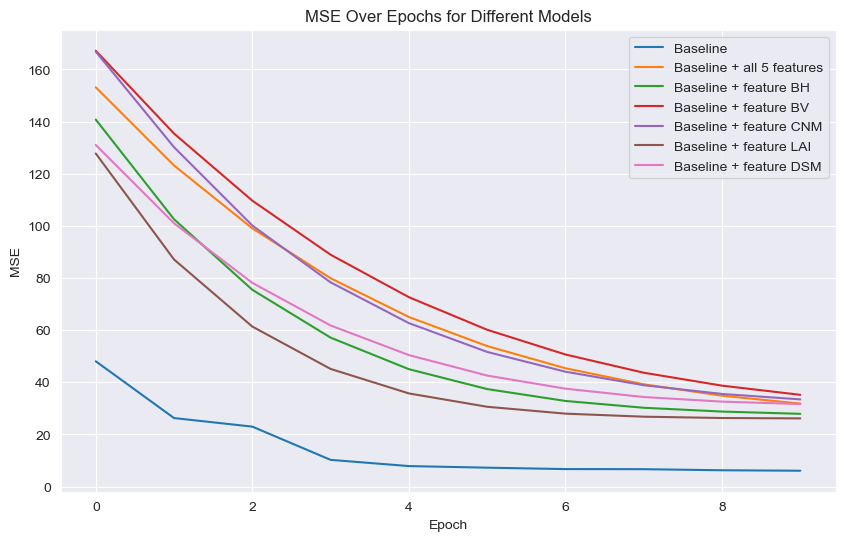

In [140]:
# 绘制 MSE 随 epoch 变化的折线图
plt.figure(figsize=(10, 6))
for key in results.keys():
    plt.plot(results[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE Over Epochs for Different Models')
plt.legend()

plt.savefig('CNN_LSTM_Images/MSE_plot.png')

plt.show()


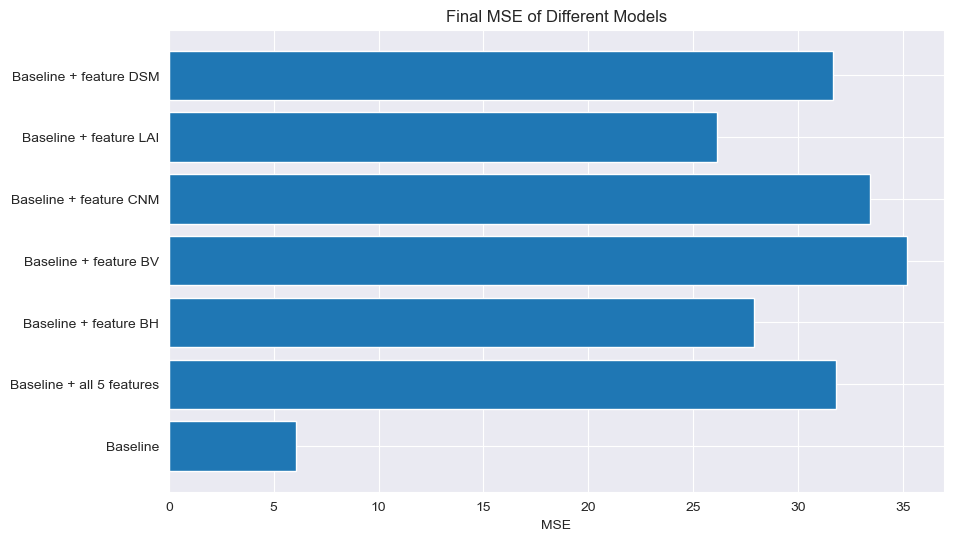

In [141]:
#绘制最终MSE值的条形图

# 取最后一个epoch的MSE值
final_mse = {key: values[-1] for key, values in results.items()}

plt.figure(figsize=(10, 6))
plt.barh(list(final_mse.keys()), list(final_mse.values()))
plt.xlabel('MSE')
plt.title('Final MSE of Different Models')

plt.savefig('CNN_LSTM_Images/Final_MSE_barplot.png')
plt.show()


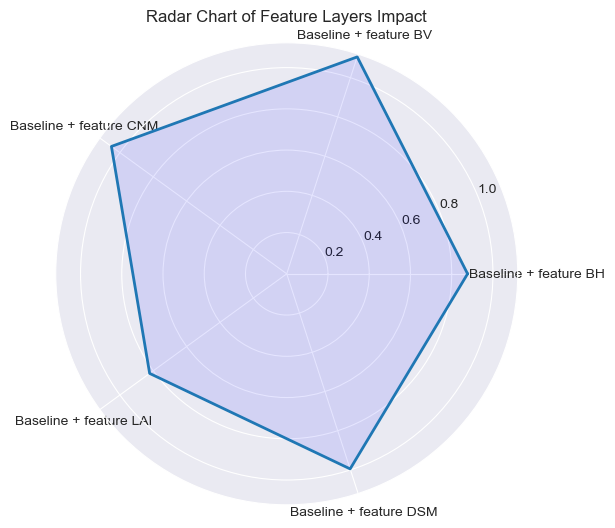

In [142]:
# 绘制雷达图
import numpy as np
from math import pi

# 基线和各个特征层的最终MSE值
labels = list(final_mse.keys())[2:]  # 去除Baseline和Baseline + all 5 features
values = list(final_mse.values())[2:]

# 添加Baseline + all 5 features的MSE为雷达图中心点
baseline_all = final_mse['Baseline + all 5 features']
values = [v / baseline_all for v in values]

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Radar Chart of Feature Layers Impact')

plt.savefig('CNN_LSTM_Images/Radar_chart.png')

plt.show()


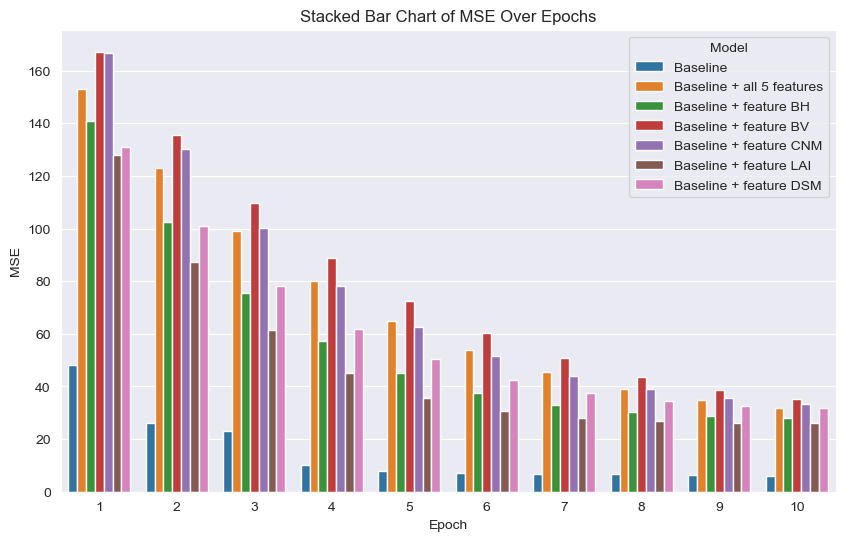

In [143]:
# 绘制堆叠条形图

import seaborn as sns

epochs = list(range(1, 11))
df = {key: results[key] for key in results.keys()}
df['Epoch'] = epochs

df = pd.DataFrame(df)

df_melted = df.melt(id_vars='Epoch', var_name='Model', value_name='MSE')

plt.figure(figsize=(10, 6))
sns.barplot(x='Epoch', y='MSE', hue='Model', data=df_melted)
plt.title('Stacked Bar Chart of MSE Over Epochs')

plt.savefig('CNN_LSTM_Images/Stacked_barplot.png')

plt.show()


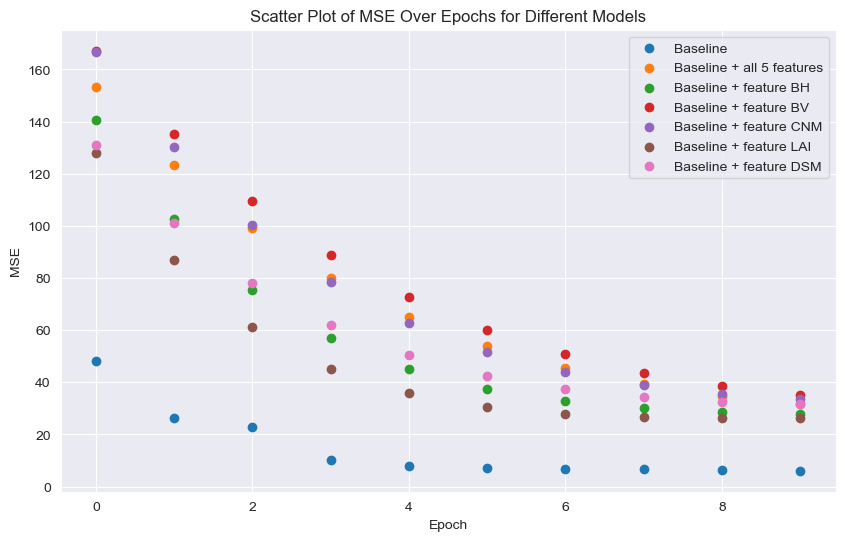

In [144]:
# 绘制影响值的堆叠条形图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for key in results.keys():
    plt.scatter(range(len(results[key])), results[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Scatter Plot of MSE Over Epochs for Different Models')
plt.legend()

plt.savefig('CNN_LSTM_Images/Scatter_plot.png')
plt.show()


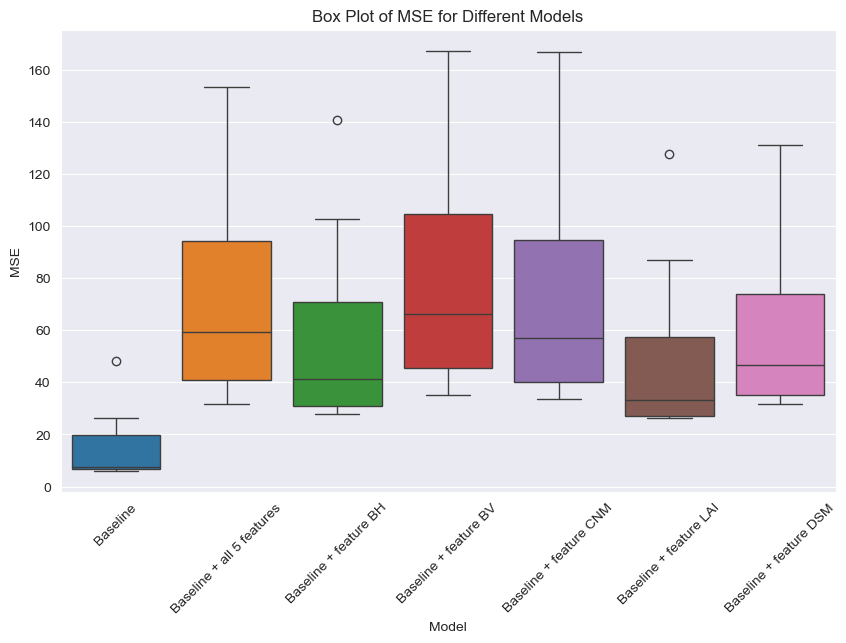

In [145]:
# 绘制箱线图

import seaborn as sns
import pandas as pd

# 将数据转换为DataFrame以便绘图
df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Box Plot of MSE for Different Models')
plt.xticks(rotation=45)

plt.savefig('CNN_LSTM_Images/Box_plot.png')

plt.show()


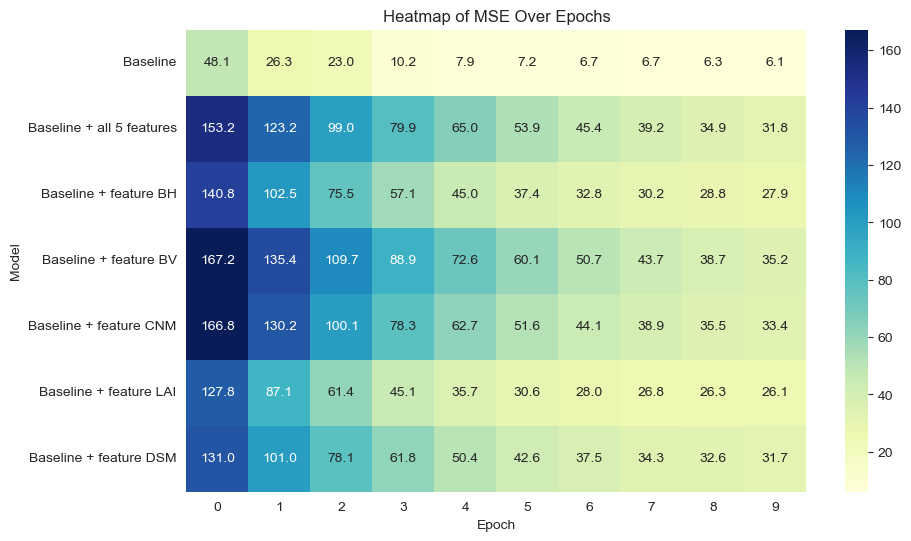

In [146]:
# 绘制热力图
import seaborn as sns

# 创建一个DataFrame，X轴为Epoch，Y轴为模型名，值为MSE
heatmap_data = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel('Epoch')
plt.ylabel('Model')
plt.title('Heatmap of MSE Over Epochs')

plt.savefig('CNN_LSTM_Images/Heatmap.png')

plt.show()


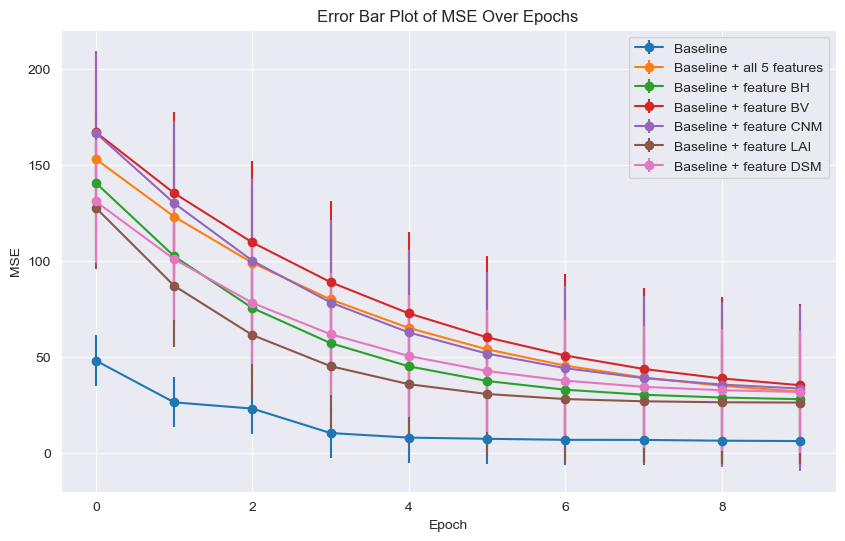

In [147]:
# 绘制误差线图
import numpy as np

plt.figure(figsize=(10, 6))
for key in results.keys():
    mse_values = np.array(results[key])
    mean = mse_values.mean()
    std = mse_values.std()
    plt.errorbar(range(len(mse_values)), mse_values, yerr=std, label=key, fmt='-o')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Error Bar Plot of MSE Over Epochs')
plt.legend()

plt.savefig('CNN_LSTM_Images/Error_bar_plot.png')

plt.show()


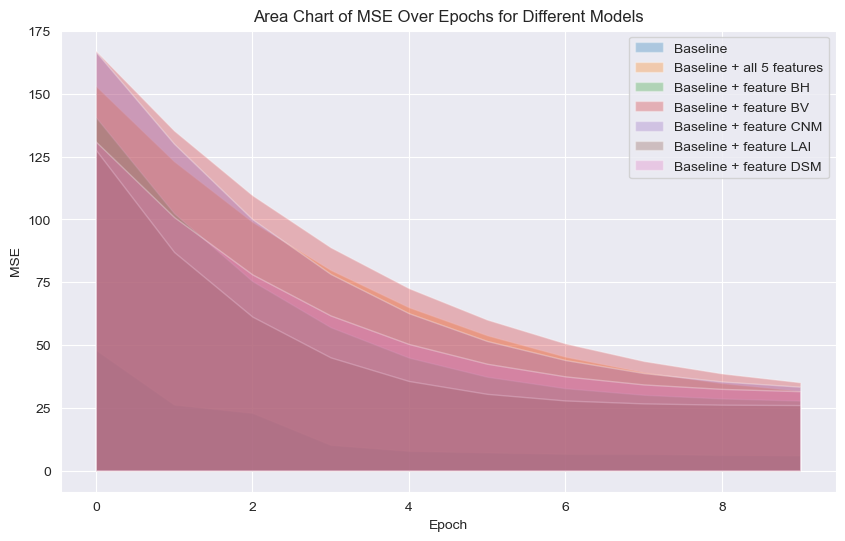

In [148]:
# 绘制面积图
plt.figure(figsize=(10, 6))
for key in results.keys():
    plt.fill_between(range(len(results[key])), results[key], label=key, alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Area Chart of MSE Over Epochs for Different Models')
plt.legend()

plt.savefig('CNN_LSTM_Images/Area_chart.png')

plt.show()


## 模型影响值分析

$$
InfluenceValue_{i} = MSE_{Baseline + i} - MSE_{Baseline + all 5 features}
$$

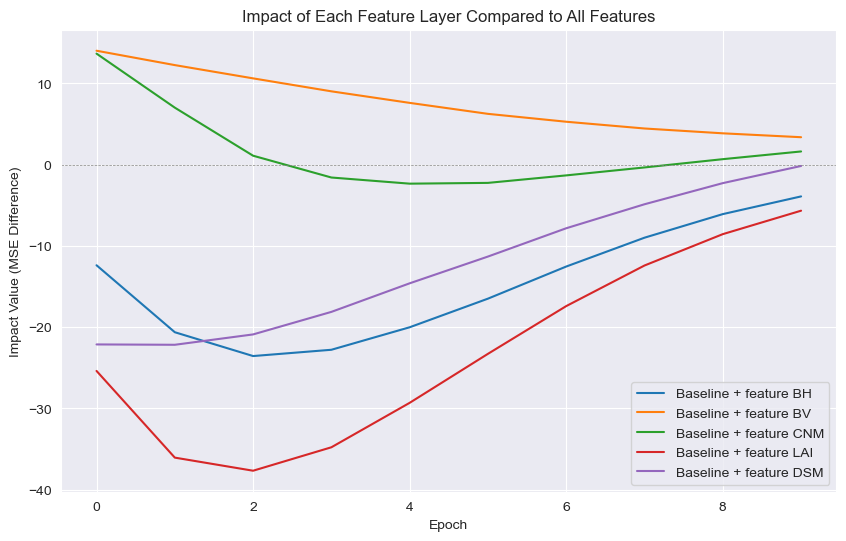

In [149]:
# 计算影响值
impact_values = {}
baseline_all = np.array(results['Baseline + all 5 features'])

for key in results.keys():
    if key != 'Baseline' and key != 'Baseline + all 5 features':
        impact_values[key] = np.array(results[key]) - baseline_all

# 绘制影响值
plt.figure(figsize=(10, 6))
for key in impact_values.keys():
    plt.plot(impact_values[key], label=key)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Epoch')
plt.ylabel('Impact Value (MSE Difference)')
plt.title('Impact of Each Feature Layer Compared to All Features')
plt.legend()

plt.savefig('CNN_LSTM_Images/Impact_plot.png')
plt.show()


这张图展示了每个特征层（如BH、BV、CNM、LAI、DSM）相对于所有特征层（Baseline + all 5 features）的影响值（即MSE差异）。具体含义如下：

Y轴：表示影响值，数值越大表明该特征层对模型预测的贡献越小，甚至可能引入了噪声；数值越小（负值）表明该特征层对预测有更好的提升。
X轴：表示训练的epoch数。
各条线：代表每个特征层相对于Baseline + all 5 features的MSE差异。比如，Baseline + feature LAI的曲线从负值开始，表明在训练初期LAI层对模型有负面影响，随着epoch增加，其影响逐渐减小。
从图中可以观察到：

大部分特征层相对于所有特征层的MSE在初期都有一个较大的差值，这可能是因为模型在初期还未充分学习特征。
随着训练的进行，Baseline + feature BV始终对模型产生了负面影响（MSE差值为正），说明BV层对预测效果有负面作用。
而Baseline + feature LAI的MSE值虽然在初期有较大的负面影响，但随着训练的进行，影响值逐渐减少，甚至接近于零，表明这个特征层在后期对模型预测能力有一定的提升。

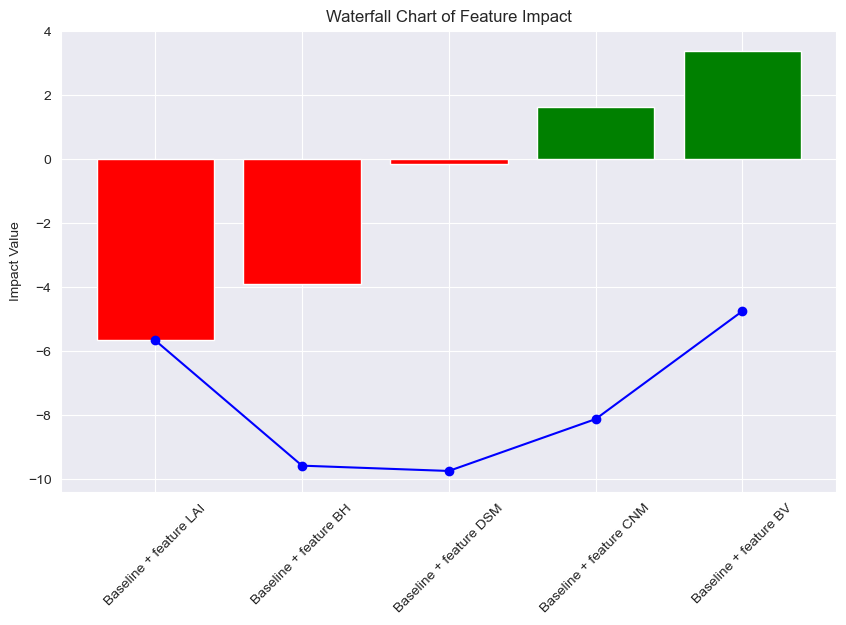

In [150]:
# 绘制瀑布图
import matplotlib.pyplot as plt
import numpy as np

# 计算每个特征的影响值变化
impact_values_final = {key: results[key][-1] - baseline_all[-1] for key in results.keys() if key != 'Baseline' and key != 'Baseline + all 5 features'}

sorted_impact = dict(sorted(impact_values_final.items(), key=lambda item: item[1]))

# 瀑布图绘制
def plot_waterfall(values, title='Waterfall Chart of Feature Impact'):
    cumulative = np.cumsum(list(values.values()))
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(values)), values.values(), color=['g' if val > 0 else 'r' for val in values.values()])
    plt.plot(range(len(values)), cumulative, color='b', marker='o')
    plt.xticks(range(len(values)), list(values.keys()), rotation=45)
    plt.ylabel('Impact Value')
    plt.title(title)
    
    plt.savefig('CNN_LSTM_Images/Waterfall_chart.png')
    plt.show()

plot_waterfall(sorted_impact)


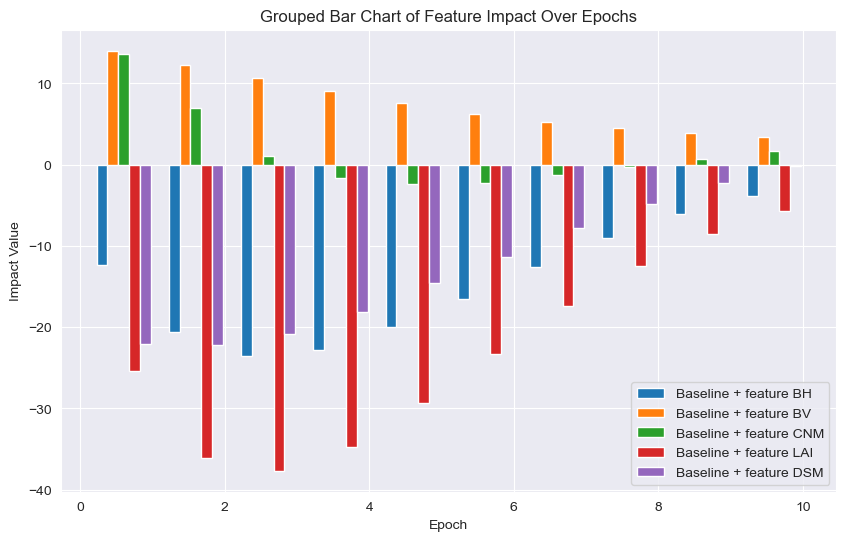

In [151]:
# 分组柱状图
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
x = np.arange(len(results['Baseline']))
width = 0.15

for i, key in enumerate(results.keys()):
    if key != 'Baseline' and key != 'Baseline + all 5 features':
        plt.bar(x + i * width, impact_values[key], width, label=key)

plt.xlabel('Epoch')
plt.ylabel('Impact Value')
plt.title('Grouped Bar Chart of Feature Impact Over Epochs')
plt.legend()

plt.savefig('CNN_LSTM_Images/Grouped_barplot.png')
plt.show()


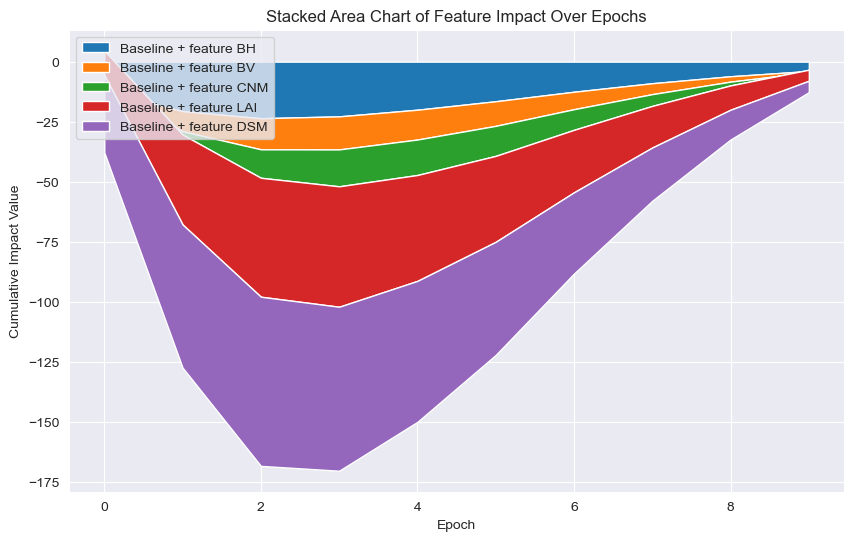

In [152]:
# 堆叠面积图
plt.figure(figsize=(10, 6))
keys = list(impact_values.keys())
impact_cumulative = np.cumsum([impact_values[key] for key in keys], axis=0)
plt.stackplot(range(len(results['Baseline'])), *impact_cumulative, labels=keys)
plt.xlabel('Epoch')
plt.ylabel('Cumulative Impact Value')
plt.title('Stacked Area Chart of Feature Impact Over Epochs')
plt.legend(loc='upper left')

plt.savefig('CNN_LSTM_Images/Stacked_area_chart.png')
plt.show()


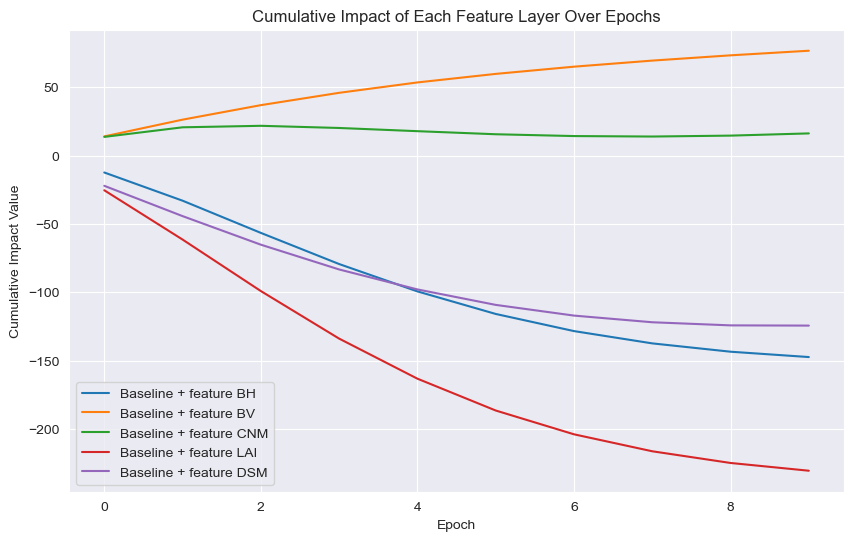

In [153]:
# 累积影响值
plt.figure(figsize=(10, 6))
for key in impact_values.keys():
    cumulative_impact = np.cumsum(impact_values[key])
    plt.plot(range(len(cumulative_impact)), cumulative_impact, label=key)

plt.xlabel('Epoch')
plt.ylabel('Cumulative Impact Value')
plt.title('Cumulative Impact of Each Feature Layer Over Epochs')
plt.legend()

plt.savefig('CNN_LSTM_Images/Cumulative_impact_plot.png')
plt.show()

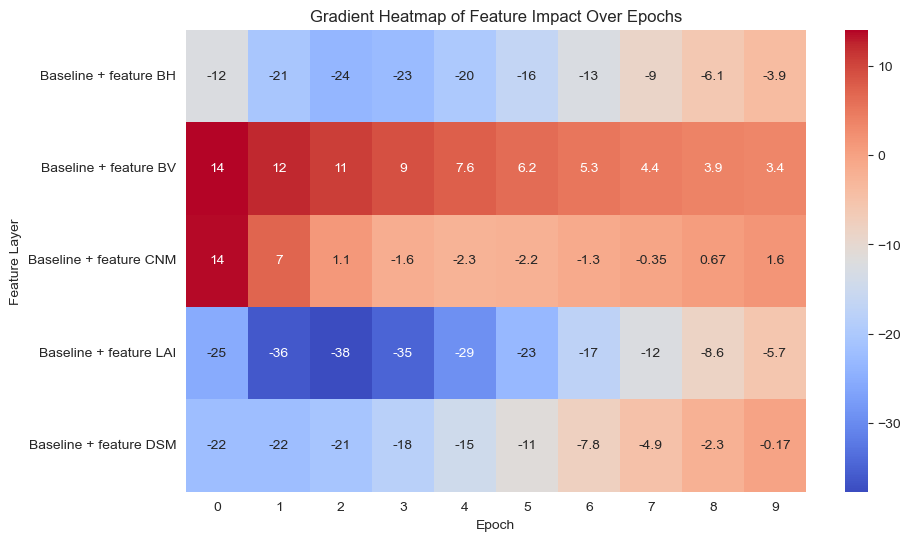

In [154]:
# 渐变热图
import seaborn as sns

cumulative_impact_data = np.array([impact_values[key] for key in impact_values.keys()])

plt.figure(figsize=(10, 6))
sns.heatmap(cumulative_impact_data, cmap='coolwarm', annot=True, xticklabels=range(len(results['Baseline'])), yticklabels=list(impact_values.keys()))
plt.xlabel('Epoch')
plt.ylabel('Feature Layer')
plt.title('Gradient Heatmap of Feature Impact Over Epochs')

plt.savefig('CNN_LSTM_Images/Gradient_heatmap.png')
plt.show()
